In [16]:
import pandas as pd
import os
df = pd.read_csv("Uber-Jan-Feb-FOIL.csv")

#Basic Data Understanding
df.head()

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB


,active_vehicles,trips
count,354.000000,354.000000
mean,1307.435028,11667.316384
std,1162.510626,10648.284865
min,112.000000,629.000000
25%,296.750000,2408.500000
50%,1077.000000,9601.000000
75%,1417.000000,13711.250000
max,4395.000000,45858.000000


In [36]:
import pandas as pd

df = pd.read_csv("Uber-Jan-Feb-FOIL.csv")

# Clean column names
df.columns = df.columns.str.strip().str.lower()

print(df.columns.tolist())

# Rename date column
df.rename(columns={'date': 'pickup_date'}, inplace=True)

# Convert to datetime
df['pickup_date'] = pd.to_datetime(df['pickup_date'])

# Feature engineering
df['Day'] = df['pickup_date'].dt.day
df['Month'] = df['pickup_date'].dt.month
df['DayOfWeek'] = df['pickup_date'].dt.dayofweek
df['Weekday_Name'] = df['pickup_date'].dt.day_name()

df.head()


['dispatching_base_number', 'date', 'active_vehicles', 'trips']


,dispatching_base_number,pickup_date,active_vehicles,trips,Day,Month,DayOfWeek,Weekday_Name
0,B02512,2015-01-01,190,1132,1,1,3,Thursday
1,B02765,2015-01-01,225,1765,1,1,3,Thursday
2,B02764,2015-01-01,3427,29421,1,1,3,Thursday
3,B02682,2015-01-01,945,7679,1,1,3,Thursday
4,B02617,2015-01-01,1228,9537,1,1,3,Thursday


Total Trips: 4130230


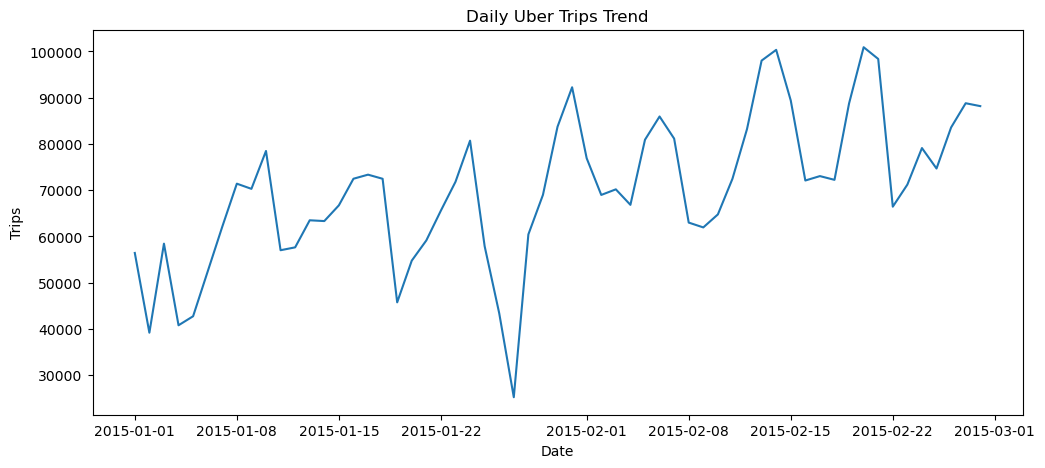

In [38]:
#Total Trips Analysis
total_trips = df['trips'].sum()
print("Total Trips:", total_trips)


#Trips by Day (Trend Analysis)
daily_trips = df.groupby('pickup_date')['trips'].sum()

plt.figure(figsize=(12,5))
plt.plot(daily_trips)
plt.title("Daily Uber Trips Trend")
plt.xlabel("Date")
plt.ylabel("Trips")
plt.show()


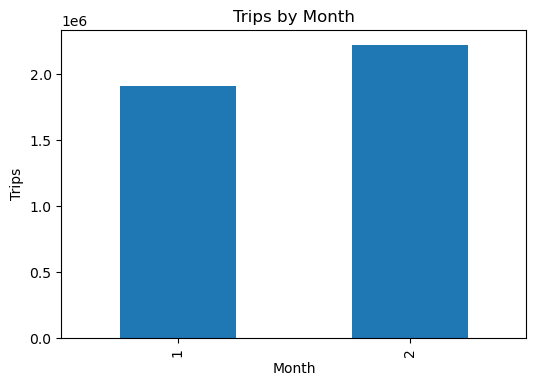

In [40]:
#Trips by Month (Jan vs Feb)
monthly_trips = df.groupby('Month')['trips'].sum()

plt.figure(figsize=(6,4))
monthly_trips.plot(kind='bar')
plt.title("Trips by Month")
plt.xlabel("Month")
plt.ylabel("Trips")
plt.show()


Average Active Vehicles: 1307.44


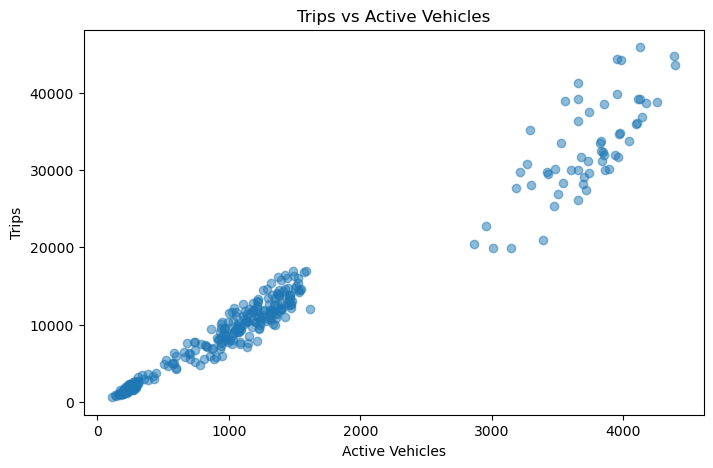

In [42]:
#Active Vehicles Analysis
avg_vehicles = df['active_vehicles'].mean()
print("Average Active Vehicles:", round(avg_vehicles, 2))


#Trips vs Active Vehicles
plt.figure(figsize=(8,5))
plt.scatter(df['active_vehicles'], df['trips'], alpha=0.5)
plt.title("Trips vs Active Vehicles")
plt.xlabel("Active Vehicles")
plt.ylabel("Trips")
plt.show()



In [44]:
#Trips per Vehicle (Efficiency KPI)
df['Trips_per_Vehicle'] = df['trips'] / df['active_vehicles']

df[['Trips_per_Vehicle']].describe()


,Trips_per_Vehicle
count,354.000000
mean,8.542137
std,1.465108
min,4.991189
25%,7.554754
50%,8.620475
75%,9.489493
max,11.753275


dispatching_base_number
B02512      93786
B02598     540791
B02617     725025
B02682     662509
B02764    1914449
B02765     193670
Name: trips, dtype: int64


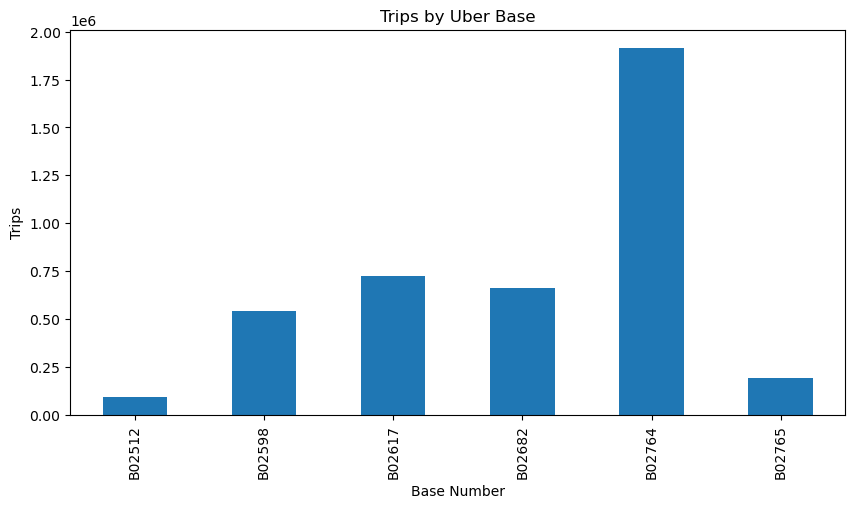

In [13]:
# Base-wise analysis
base_trips = df.groupby('dispatching_base_number')['trips'].sum()
print(base_trips)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
base_trips.plot(kind='bar')
plt.title("Trips by Uber Base")
plt.xlabel("Base Number")
plt.ylabel("Trips")
plt.show()

